# Objective- To Build a Linear Regression model to predict the price of house based the given features.

1. Find the relationship between numeric & dep var, categorical data vs dep var

In [1]:
# import the library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
print('All imported')

All imported


In [22]:
# load the dataset
housing=pd.read_csv('Housing.csv')

In [3]:
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [4]:
housing.shape

(545, 13)

In [5]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [6]:
housing.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [7]:
housing.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


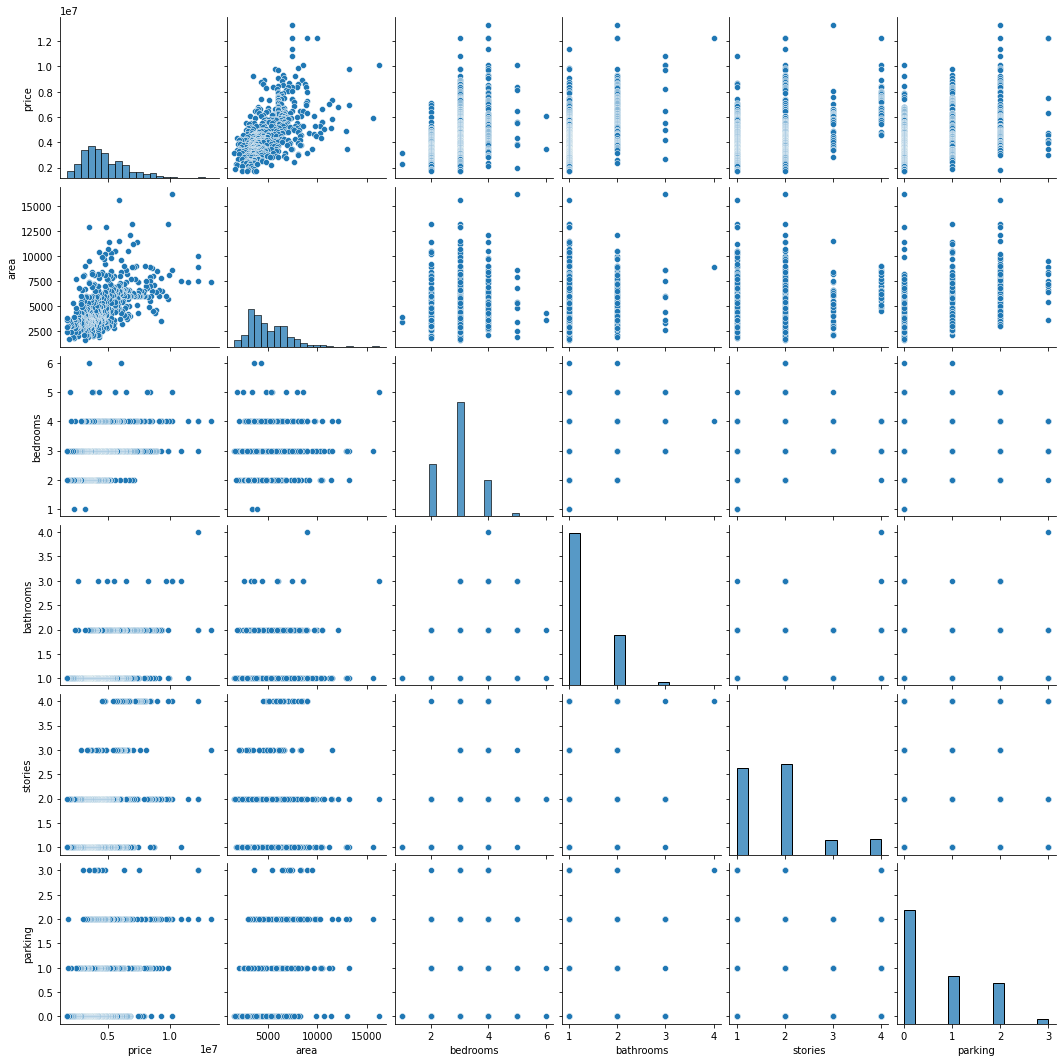

In [8]:
# Data Analysis, EDA
# multivariate analysis
# scatter plot - for all numeric data
sns.pairplot(housing)
plt.show()

In [9]:
housing.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

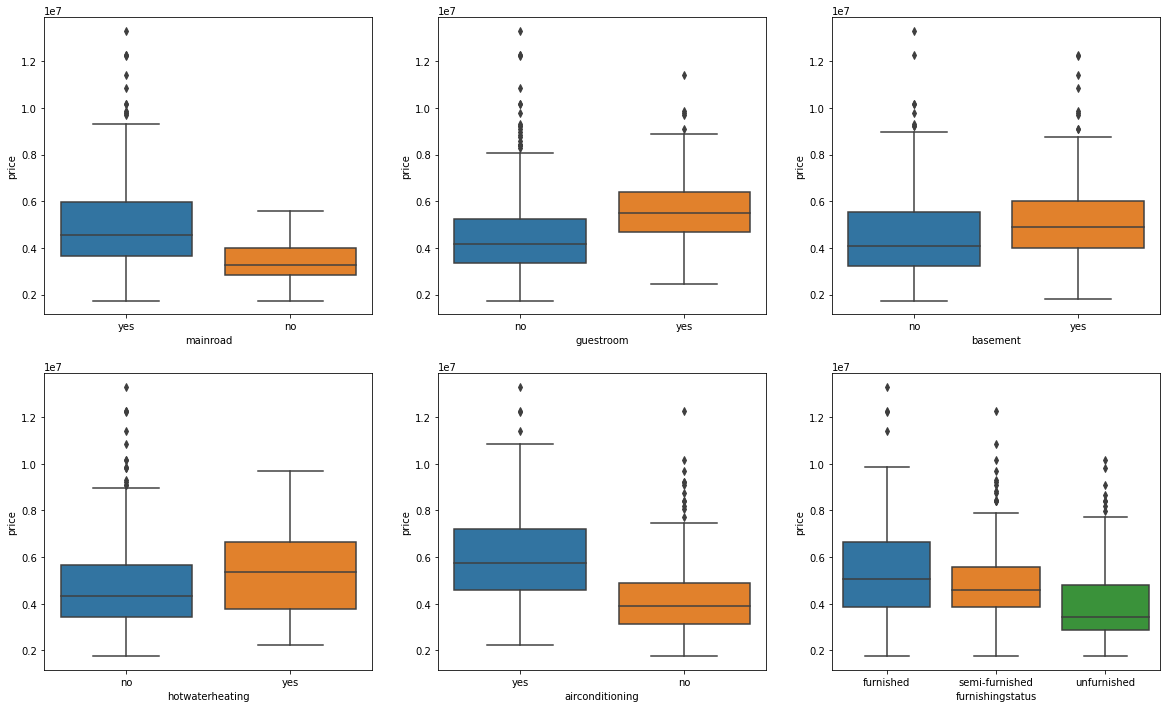

In [10]:
# print relation between categorical var
plt.figure(figsize=(20,12))
plt.subplot(2,3,1)
sns.boxplot(x='mainroad',y='price',data=housing)
plt.subplot(2,3,2)
sns.boxplot(x='guestroom',y='price',data=housing)
plt.subplot(2,3,3)
sns.boxplot(x='basement',y='price',data=housing)
plt.subplot(2,3,4)
sns.boxplot(x='hotwaterheating',y='price',data=housing)
plt.subplot(2,3,5)
sns.boxplot(x='airconditioning',y='price',data=housing)
plt.subplot(2,3,6)
sns.boxplot(x='furnishingstatus',y='price',data=housing)
plt.show()

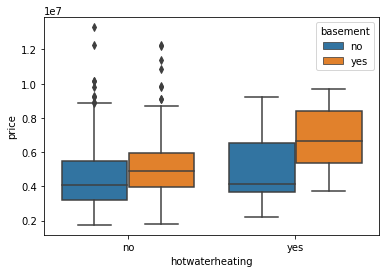

In [12]:
sns.boxplot(x='hotwaterheating',y='price',hue='basement',data=housing)
plt.show()

# Step - Data Preparation
Convert categorical data into num data


In [13]:
housing.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [23]:
varlist=['mainroad','guestroom', 'basement', 'hotwaterheating', 'airconditioning','prefarea']

In [24]:
# define function
def replace_fun(x):
    return x.map({'yes':1,'no':0})

In [25]:
# apply on the dataset
housing[varlist]=housing[varlist].apply(replace_fun)

In [26]:
housing.head(20)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished
5,10850000,7500,3,3,1,1,0,1,0,1,2,1,semi-furnished
6,10150000,8580,4,3,4,1,0,0,0,1,2,1,semi-furnished
7,10150000,16200,5,3,2,1,0,0,0,0,0,0,unfurnished
8,9870000,8100,4,1,2,1,1,1,0,1,2,1,furnished
9,9800000,5750,3,2,4,1,1,0,0,1,1,1,unfurnished


In [27]:
housing['mainroad'].value_counts()

1    468
0     77
Name: mainroad, dtype: int64

In [28]:
housing['furnishingstatus'].value_counts()

semi-furnished    227
unfurnished       178
furnished         140
Name: furnishingstatus, dtype: int64

In [ ]:
label encoding
0 fur
1 semi 
2 un
3
4
5


In [29]:
# Dummy encoding
status=pd.get_dummies(housing['furnishingstatus'])

In [30]:
status

,furnished,semi-furnished,unfurnished
0,1,0,0
1,1,0,0
2,0,1,0
3,1,0,0
4,1,0,0
...,...,...,...
540,0,0,1
541,0,1,0
542,0,0,1
543,1,0,0


In [31]:
# Add the results to original housing dataframe
housing=pd.concat([housing,status],axis=1)

In [32]:
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,furnished,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished,1,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished,0,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished,1,0,0


In [33]:
housing.drop(['furnishingstatus'],axis=1,inplace=True)

In [34]:
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnished,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,1,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,0,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,1,0,0


In [35]:
# Split the data into train & test
from sklearn.model_selection import train_test_split
df_train,df_test=train_test_split(housing,test_size=0.3,random_state=100)

In [37]:
df_train.shape

(381, 15)

In [38]:
df_test.shape

(164, 15)

In [39]:
df_train.head()
x-xmean/std


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnished,semi-furnished,unfurnished
359,3710000,3600,3,1,1,1,0,0,0,0,1,0,0,0,1
19,8855000,6420,3,2,2,1,0,0,0,1,1,1,0,1,0
159,5460000,3150,3,2,1,1,1,1,0,1,0,0,1,0,0
35,8080940,7000,3,2,4,1,0,0,0,1,2,0,1,0,0
28,8400000,7950,5,2,2,1,0,1,1,0,2,0,0,0,1


In [40]:
# rescle- std scaler, minmax scaler
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [41]:
housing.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnished', 'semi-furnished', 'unfurnished'],
      dtype='object')

In [42]:
num_vars=['area','bedrooms','bathrooms','stories','parking']
df_train[num_vars]=scaler.fit_transform(df_train[num_vars])

In [43]:
df_train.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnished,semi-furnished,unfurnished
359,3710000,0.155227,0.4,0.0,0.000000,1,0,0,0,0,0.333333,0,0,0,1
19,8855000,0.403379,0.4,0.5,0.333333,1,0,0,0,1,0.333333,1,0,1,0
159,5460000,0.115628,0.4,0.5,0.000000,1,1,1,0,1,0.000000,0,1,0,0
35,8080940,0.454417,0.4,0.5,1.000000,1,0,0,0,1,0.666667,0,1,0,0
28,8400000,0.538015,0.8,0.5,0.333333,1,0,1,1,0,0.666667,0,0,0,1



scaled_x=(x-min(x))/(max(x)-min(x))

In [47]:
housing.corr()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnished,semi-furnished,unfurnished
price,1.000000,0.535997,0.366494,0.517545,0.420712,0.296898,0.255517,0.187057,0.093073,0.452954,0.384394,0.329777,0.229350,0.063656,-0.280587
area,0.535997,1.000000,0.151858,0.193820,0.083996,0.288874,0.140297,0.047417,-0.009229,0.222393,0.352980,0.234779,0.145772,0.006156,-0.142278
bedrooms,0.366494,0.151858,1.000000,0.373930,0.408564,-0.012033,0.080549,0.097312,0.046049,0.160603,0.139270,0.079023,0.079054,0.050040,-0.126252
bathrooms,0.517545,0.193820,0.373930,1.000000,0.326165,0.042398,0.126469,0.102106,0.067159,0.186915,0.177496,0.063472,0.108139,0.029834,-0.132107
stories,0.420712,0.083996,0.408564,0.326165,1.000000,0.121706,0.043538,-0.172394,0.018847,0.293602,0.045547,0.044425,0.093176,-0.003648,-0.082972
mainroad,0.296898,0.288874,-0.012033,0.042398,0.121706,1.000000,0.092337,0.044002,-0.011781,0.105423,0.204433,0.199876,0.129971,0.011450,-0.133123
guestroom,0.255517,0.140297,0.080549,0.126469,0.043538,0.092337,1.000000,0.372066,-0.010308,0.138179,0.037466,0.160897,0.099721,0.005821,-0.099023
basement,0.187057,0.047417,0.097312,0.102106,-0.172394,0.044002,0.372066,1.000000,0.004385,0.047341,0.051497,0.228083,0.069852,0.050284,-0.117935
hotwaterheating,0.093073,-0.009229,0.046049,0.067159,0.018847,-0.011781,-0.010308,0.004385,1.000000,-0.130023,0.067864,-0.059411,-0.008472,0.063819,-0.059194
airconditioning,0.452954,0.222393,0.160603,0.186915,0.293602,0.105423,0.138179,0.047341,-0.130023,1.000000,0.159173,0.117382,0.160994,-0.053179,-0.094086


<AxesSubplot:>

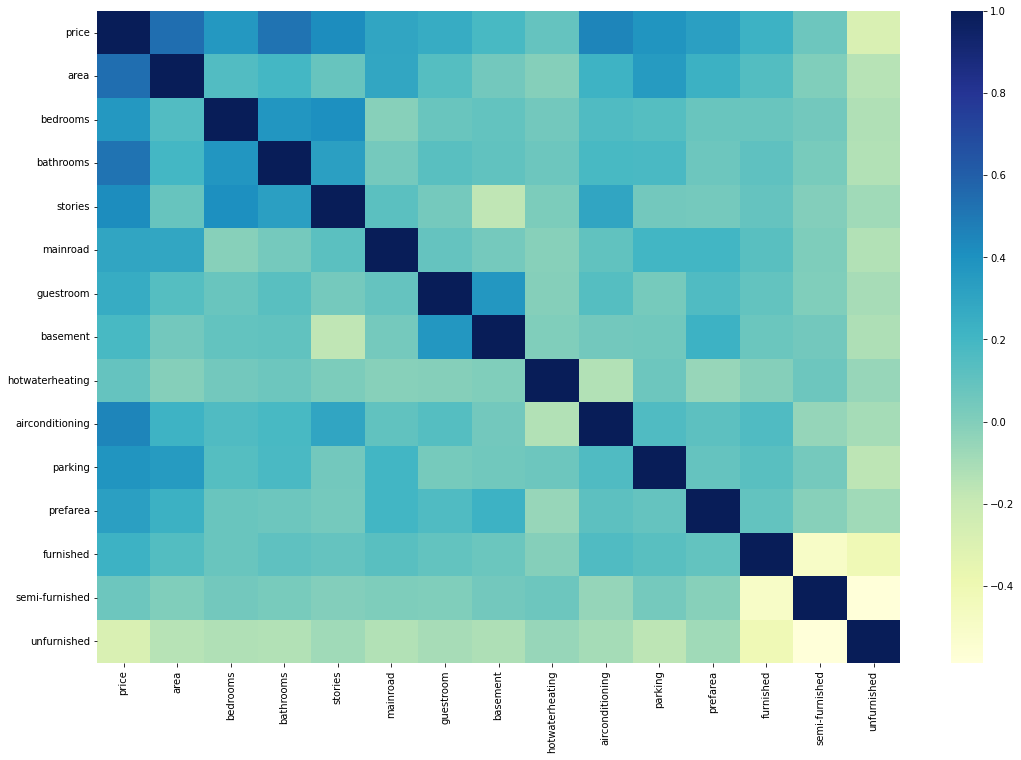

In [56]:
plt.figure(figsize=(18,12))
sns.heatmap(housing.corr(),cmap='YlGnBu')

# model1 
sklearn LR
all var for training

In [60]:
num_vars=['area','bedrooms','bathrooms','stories','parking']
df_test[num_vars]=scaler.transform(df_test[num_vars])

In [61]:
# Build the model
y_test=df_test.pop('price')
X_test=df_test

In [57]:
# Build the model
y_train=df_train.pop('price')
X_train=df_train

In [58]:
from sklearn.linear_model import LinearRegression
lr1=LinearRegression()

In [62]:
lr1.fit(X_train,y_train)

LinearRegression()

In [63]:
y_pred=lr1.predict(X_test)

In [64]:
y_pred

array([ 4143699.20401053,  6661197.08181507,  5722054.00233195,
        5326517.21254472,  4831442.86600476,  4069360.34709719,
        8056958.09626048,  5730070.17238169,  3497755.69355818,
        5656737.4498868 ,  3007238.80961842,  6228868.5436514 ,
        4634454.99370186,  7313434.75345383,  5686360.38270114,
        6851266.51466319,  8168306.9360112 ,  4393064.17098192,
        6030273.96590467,  4874126.77539174,  4247412.32162118,
        2736529.65918786,  4520239.27339991,  3675698.98497435,
        2713706.03931619,  3408037.10445584,  5194163.00991126,
        6510696.80485491,  6477903.59694152,  5026480.65351801,
        3139466.60291855,  4554147.98375741,  3008821.69360242,
        2746228.35996764,  4947249.97388391,  4625625.57606808,
        4621248.56900481,  3286474.77861032,  3349232.4483743 ,
        4282981.41406616,  3107246.88654326,  6010907.80072258,
        6072531.92651977,  2974078.32060295,  2651694.89785839,
        4636773.50218128,  4485916.71184

In [65]:
# evaluate the model
from sklearn.metrics import mean_squared_error,r2_score
print(mean_squared_error(y_test,y_pred))

1283969782447.7505


In [66]:
# evaluate the model
print(r2_score(y_test,y_pred))

0.6729582743459916


In [67]:
y_pred_train=lr1.predict(X_train)

In [68]:
# evaluate the model
print(r2_score(y_train,y_pred_train))

0.6814893088451202


# Model2 

In [ ]:
Null Hypothesis - variable have no effect and can be removed

In [ ]:
p value<0.05  Reject the  Null Hypothesis , variable have some effect, need to be retained
p>0.05 -Accept Null hypothesis 

In [ ]:
area p value = 0.000000

basement=0.06 

In [69]:
# model2 keep all
import statsmodels.api as sm

In [70]:
lr2=sm.OLS(y_train,X_train)
lr2=lr2.fit()